In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import string
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import defaultdict 
from decimal import Decimal 
import re

# Load Data

In [2]:
df = pd.read_csv('virtual_assembly_rsvp_list_noNames_cleaned3.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   How do you identify? (Race and Ethnicity)               801 non-null    object
 1   race_category                                           805 non-null    object
 2   Are you looking for a new role or opportunity?          803 non-null    object
 3   What are your top 3 needs as a womxn of color at work?  773 non-null    object
 4   Billing Zip                                             776 non-null    object
 5   Job Title                                               805 non-null    object
 6   Job_Title_Grouped                                       805 non-null    object
 7   Career_Level                                            787 non-null    object
 8   Industry                                          

,How do you identify? (Race and Ethnicity),race_category,Are you looking for a new role or opportunity?,What are your top 3 needs as a womxn of color at work?,Billing Zip,Job Title,Job_Title_Grouped,Career_Level,Industry,Company,Company_Original
0,African American,Black,"Interested, but not actively seeking a new role",To have my expertise acknowledge\nTo be includ...,98118,"Director, Volunteer Engagement","Director, Volunteer Engagement",Executive/Director,Community Building/ Outreach,United Way Of King County,United Way Of King County
1,Multiracial Se Asian *and* Pacific Islander Am...,Multiracial,"Interested, but not actively seeking a new role",* As a result of the leaky STEMM pipeline in p...,98402,Biologist,Biologist,Mid,Healthcare / Life Sciences,University Of Washington,University Of Washington
2,South Asian,Asian,No,NaN,98107,Health Economist,Health Economist,Mid,Healthcare / Life Sciences,Seattle Genetics,Seattle Genetics
3,South Asian,Asian,"Interested, but not actively seeking a new role",representation and community of other womxn of...,98103,Principal,Principal,Executive/Director,Education,Mercer,Mercer
4,African American,Black,"Interested, but not actively seeking a new role",Affinity with a trusted band of people; for th...,98052,"Director, Opportunity, Equity And Inclusion","Director, Opportunity, Equity And Inclusion",Executive/Director,Education,Lake Washington School District,Lake Washington School District


## Separate out text into a list 

Also drop null values

In [3]:
df.dropna(how='any',inplace=True)
text = df['What are your top 3 needs as a womxn of color at work?'].astype(str)
text = list(df['What are your top 3 needs as a womxn of color at work?'])
text

['To have my expertise acknowledge\nTo be included in strategic discussion upfront\nTo understand my role as a women of color, with connections to communities of color we value, adds time to my workload',
 '* As a result of the leaky STEMM pipeline in public schools through higher education, I often feel alone in my community as a first-generation, low-income earner scientist. There are few of us in STEMM in general and even less so working specifically in the realms of trans-disciplinary conservation biology, environment, ONE Health, marine & ocean, sustainability, and climate justice & advocacy. I regularly feel like I lack the professional skill sets or same supports my White peers have as a result of [colonization] their inter-generational wealth, affluent education backgrounds and legacies of nepotism to break through the "green ceiling". \n\n*I want to create an environmental justice start-up to break away from the toxic philanthropy and non-profit complex; while simultaneously c

In [6]:
cleaned_text = []
for t in text: 
    t = t.lower()
    entries = re.split(r';|[1-4]|\n',t) 
    for e in entries: 
        e = e.translate(str.maketrans('', '', string.punctuation))
        cleaned_text.append(e.strip())
print(len(cleaned_text))
print(cleaned_text)

1182
['to have my expertise acknowledge', 'to be included in strategic discussion upfront', 'to understand my role as a women of color with connections to communities of color we value adds time to my workload', 'as a result of the leaky stemm pipeline in public schools through higher education i often feel alone in my community as a firstgeneration lowincome earner scientist there are few of us in stemm in general and even less so working specifically in the realms of transdisciplinary conservation biology environment one health marine  ocean sustainability and climate justice  advocacy i regularly feel like i lack the professional skill sets or same supports my white peers have as a result of colonization their intergenerational wealth affluent education backgrounds and legacies of nepotism to break through the green ceiling', '', 'i want to create an environmental justice startup to break away from the toxic philanthropy and nonprofit complex', 'while simultaneously creating livingw

In [7]:
all_text = " ".join(t for t in cleaned_text)
len(all_text)

41960

# Wordcloud 
For the wordcloud - attendee responses have been separated. But I dont' think this matters. 

In [28]:
matplotlib.font_manager.findSystemFonts()

['C:\\WINDOWS\\Fonts\\segmdl2.ttf',
 'C:\\WINDOWS\\Fonts\\ariblk.ttf',
 'C:\\WINDOWS\\Fonts\\constanz.ttf',
 'C:\\Windows\\Fonts\\Candarali.ttf',
 'C:\\Windows\\Fonts\\comicz.ttf',
 'C:\\Windows\\Fonts\\SCHLBKI.TTF',
 'C:\\Windows\\Fonts\\PermanentMarker.ttf',
 'C:\\WINDOWS\\Fonts\\CALIFR.TTF',
 'C:\\WINDOWS\\Fonts\\cambria.ttc',
 'C:\\WINDOWS\\Fonts\\GIL_____.TTF',
 'C:\\Windows\\Fonts\\dead.ttf',
 'C:\\WINDOWS\\Fonts\\SitkaZ.ttc',
 'C:\\WINDOWS\\Fonts\\ITCKRIST.TTF',
 'C:\\WINDOWS\\Fonts\\LTYPE.TTF',
 'C:\\Windows\\Fonts\\Limelight-Regular.ttf',
 'C:\\Windows\\Fonts\\PERTIBD.TTF',
 'C:\\WINDOWS\\Fonts\\BungeeInline-Regular.ttf',
 'C:\\Windows\\Fonts\\FTLTLT.TTF',
 'C:\\Windows\\Fonts\\OCRAEXT.TTF',
 'C:\\WINDOWS\\Fonts\\ITCEDSCR.TTF',
 'C:\\WINDOWS\\Fonts\\LSANSDI.TTF',
 'C:\\Windows\\Fonts\\COPRGTB.TTF',
 'C:\\WINDOWS\\Fonts\\CURLZ___.TTF',
 'C:\\Windows\\Fonts\\Candarab.ttf',
 'C:\\WINDOWS\\Fonts\\courbd.ttf',
 'C:\\WINDOWS\\Fonts\\COPRGTB.TTF',
 'C:\\WINDOWS\\Fonts\\arial.ttf',
 '

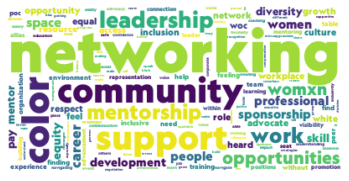

In [33]:
# Collocations removed
### words that frequently show up together. 
### Might get rid of things like "professional development, however"
wordcloud = WordCloud(font_path='GeographTest-Black.otf', max_font_size=100, max_words=150, collocations=False, background_color='white').generate(all_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

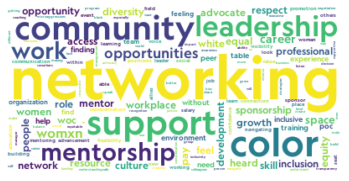

In [35]:
wordcloud = WordCloud(font_path='GeographTest-Medium.otf', max_font_size=100, max_words=150, collocations=False, background_color='white').generate(all_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

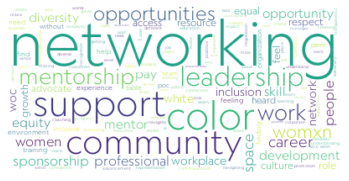

In [36]:
wordcloud = WordCloud(font_path='GeographTest-Light.otf', max_font_size=100, max_words=150, collocations=False, background_color='white').generate(all_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Colors: 

colors_extended = colors = ['#421639','#1b3c31','#a26629','#9a7565','#e5e5e5','#674460','#48625a','#a0a0a0']
sns.set_palette(sns.color_palette(colors_extended))

In [38]:
# function taken from wordcloud github 
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(312, 50%, 17%)"

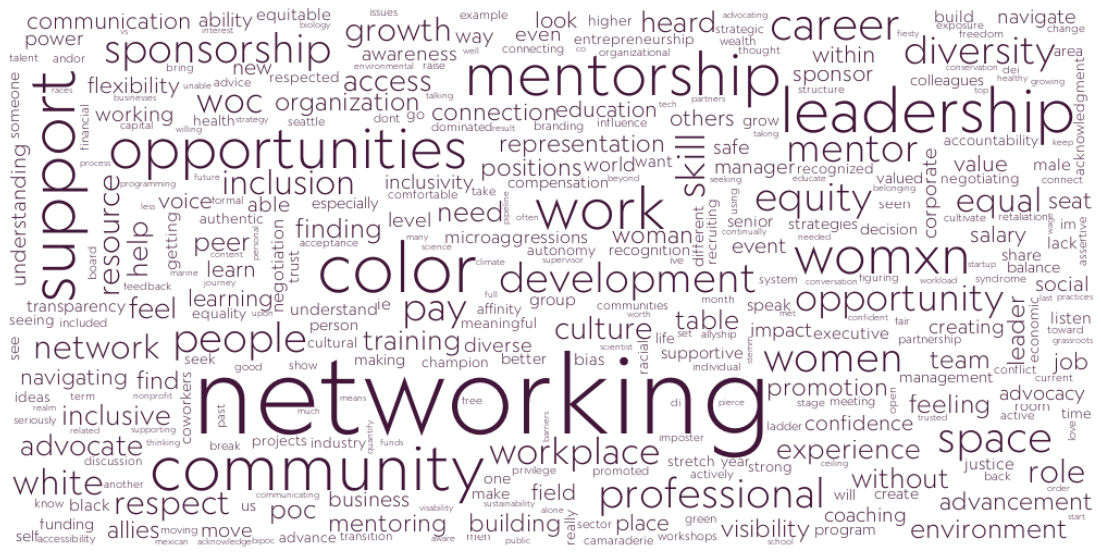

In [44]:
#fonts = ['GeographTest-Black.otf', 'GeographTest-Medium.otf', 'GeographTest-Light.otf']

plt.figure(figsize=(20,10))
wordcloud = WordCloud(font_path='GeographTest-Light.otf',width=1000, height=500, max_font_size=100, max_words=350, collocations=False, background_color='white').generate(all_text)
default_colors = wordcloud.to_array()
#plt.title("Custom colors")
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()
wordcloud.to_file('wordcloud_purple_gfont_L2.png')

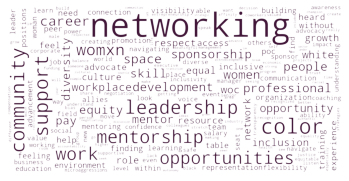

In [132]:
# Transparent background
wordcloud = WordCloud(max_font_size=100, width=1000, height=500,collocations=False, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(all_text)
default_colors = wordcloud.to_array()
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()
wordcloud.to_file('wordcloud_purple_transparent.png')

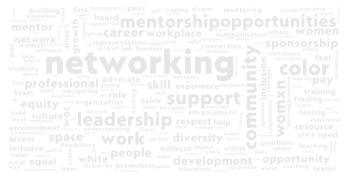

In [48]:
# Transparent background - gray text 

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%, 90%)"

wordcloud = WordCloud(font_path='GeographTest-Black.otf', max_font_size=100, width=1000, height=500,collocations=False, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(all_text)
default_colors = wordcloud.to_array()
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()
wordcloud.to_file('wordcloud_gray_transparent_gfontD.png')

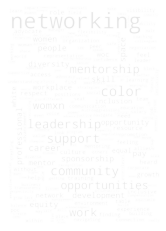

In [136]:
# Transparent background - gray text - long 

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%, 90%)"

wordcloud = WordCloud(max_font_size=100, width=700, height=1000,collocations=False, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(all_text)
default_colors = wordcloud.to_array()
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()
wordcloud.to_file('wordcloud_gray_transparent_long.png')

## Find the top 10 words - pick out of wordcloud
## Then search for them 

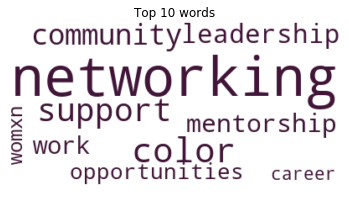

In [14]:
wordcloud = WordCloud(max_font_size=100, max_words=10, collocations=False, background_color='white').generate(all_text)
default_colors = wordcloud.to_array()
plt.title("Top 10 words")
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
top_needs = ['networking', 'leadership','support', 'career', 'community', 'mentorship']
top_needs_searchable_test = ['networking', 'netw', 'leadership','support', 'career', 'communit', 'mentor']
top_needs_searchable = ['netw', 'leadership', 'support', 'career', 'communit', 'mentor']
# these also came up, but are not needs: 'color', 'womxn', 'work'
# I'm also removing opportunities since it's ambiguous 

# Clean text for searching 
Separated by attendees not by responses (each attendee only gets 1 entry instead of 3 as for the word cloud) 

In [8]:
text_lower = []
for t in text: 
    t = t.lower()
    text_lower.append(t)
print(len(text))
print(len(text_lower))

674
674


In [12]:
count_needs = defaultdict()
for need in top_needs_searchable: 
    counter = 0
    for entry in text_lower:
        if need in entry: 
            counter += 1
    count_needs[need]= counter
count_needs

defaultdict(None,
            {'netw': 322,
             'leadership': 56,
             'support': 76,
             'career': 28,
             'communit': 67,
             'mentor': 95})

In [13]:
needs_df = pd.DataFrame.from_dict(count_needs, orient='index').reset_index()
top_needs = ['Networking', 'Leadership','Support', 'Career', 'Community', 'Mentorship']
needs_df['Topic'] = top_needs
needs_df.rename(columns={'index':'search_term', 0:'Number of Attendees'},inplace=True)
needs_df = needs_df.sort_values(by='Number of Attendees', ascending=False)
needs_df['Percent of Attendees'] = needs_df['Number of Attendees'].apply(lambda x: round(Decimal(x/674*100),1))
needs_df

,search_term,Number of Attendees,Topic,Percent of Attendees
0,netw,322,Networking,47.8
5,mentor,95,Mentorship,14.1
2,support,76,Support,11.3
4,communit,67,Community,9.9
1,leadership,56,Leadership,8.3
3,career,28,Career,4.2


# Generate Images for Report

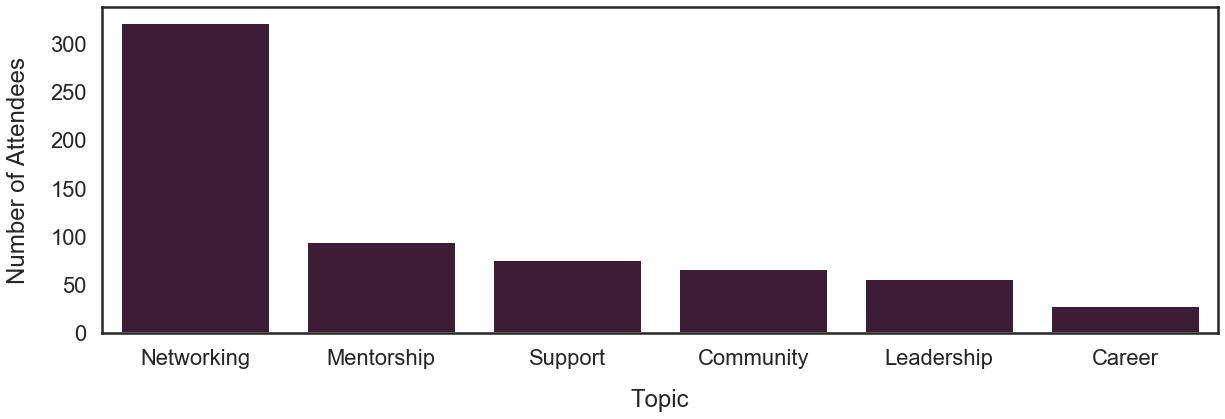

In [122]:
plt.figure(figsize=(20,6))
plt.tight_layout()
plt.xlabel('Topic', labelpad=20)
plt.ylabel('Number of Attendees', labelpad=20)
sns.set_context('poster',font_scale=1)
sns.set_style('white',{'axes.grid': 'False'})
sns.barplot(x='Topic', y='Number of Attendees',data=needs_df,color='#421639')
plt.savefig('top_needs_bar_purple', dpi=300,transparent=True,bbox_inches='tight')

### Trying to change fonts as well - doesn't seem to be working. Can't find Kannada 

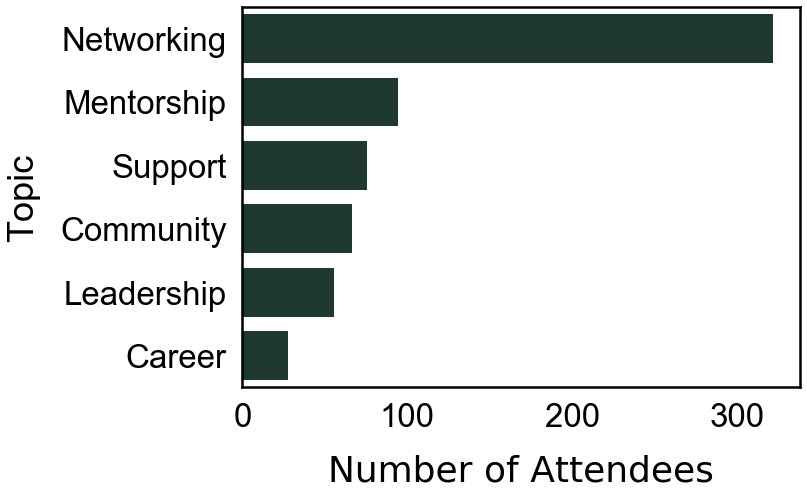

In [22]:
# USE THIS ONE

# Purple 421639
# Green 1b3c31
# Gold a26629 
# Gray e5e5e5
# Copper 9a7565

gfont = {'fontname': 'Geograph Test'}
kfont = {'fontname':'Kannada MN'}

plt.figure(figsize=(10,7))
plt.tight_layout()
plt.xlabel('Topic', labelpad=20, **gfont)
plt.ylabel('Number of Attendees', labelpad=20)
sns.set_context('poster',font_scale=1.5)

plt.rcParams.update({'text.color':'black',
                    'axes.labelcolor':'black', 
                    'xtick.color':'black',
                    'ytick.color':'black',
                    'axes.edgecolor':'black'})

sns.barplot(y='Topic', x='Number of Attendees',data=needs_df,color='#1b3c31')
#plt.savefig('top_needs_horiz_bar_green', dpi=300,transparent=True,bbox_inches='tight')

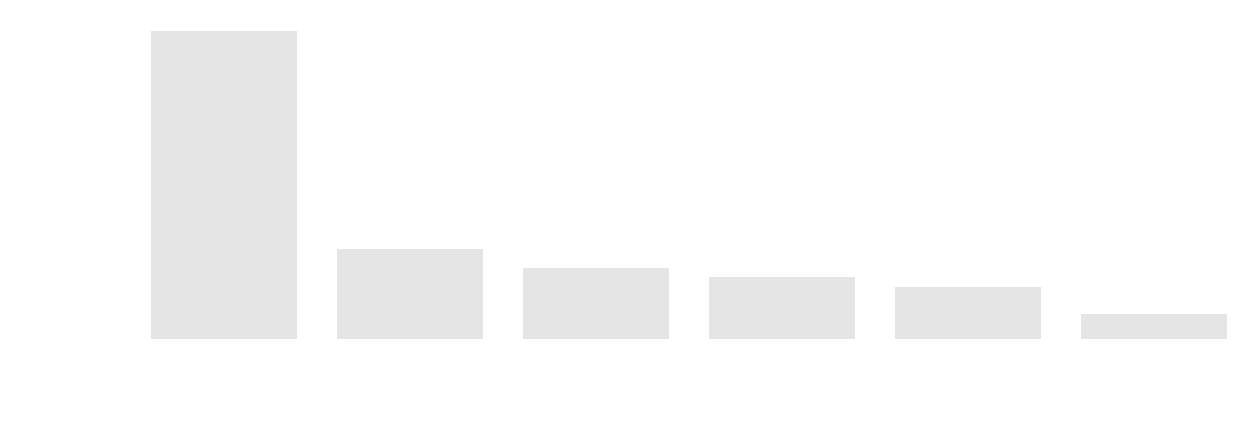

In [120]:
plt.figure(figsize=(20,6))
sns.set_style('white',{'axes.grid': 'False'})
plt.rcParams.update({'text.color':'white',
                    'axes.labelcolor':'white', 
                    'xtick.color':'white',
                    'ytick.color':'white',
                    'axes.edgecolor':'white'})
plt.tight_layout()
plt.xlabel('Topic', labelpad=20)
plt.ylabel('Number of Attendees', labelpad=20)
sns.set_context('poster', font_scale=1)

sns.barplot(x='Topic', y='Number of Attendees',data=needs_df,color='#e5e5e5')
plt.savefig('top_needs_bar_gray', dpi=300,transparent=True,bbox_inches='tight')

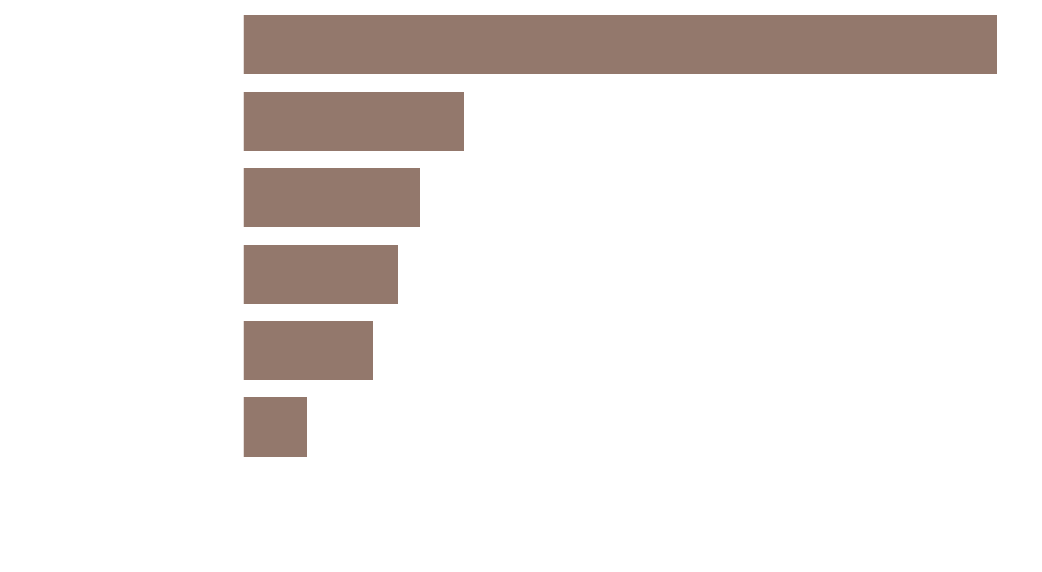

In [17]:
plt.figure(figsize=(14,9))
sns.set_style('white',{'axes.grid': 'False'})
plt.rcParams.update({'text.color':'white',
                    'axes.labelcolor':'white', 
                    'xtick.color':'white',
                    'ytick.color':'white',
                    'axes.edgecolor':'white'})
plt.xlabel('Topic', labelpad=20)
plt.ylabel('Number of Attendees', labelpad=20)
sns.set_context('poster',font_scale=1.5)
plt.tight_layout()
sns.barplot(y='Topic', x='Number of Attendees',data=needs_df,color='#9a7565')
plt.savefig('top_needs_horiz_bar_copper', dpi=300,transparent=True,bbox_inches='tight')